<a href="https://colab.research.google.com/github/Jerry-Chang975/ML-practice-project/blob/master/ML_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab Machine Learning Practice

Build LSTM Model

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
#normalization
def normalization(sequence):
    a = [0]*2
    seq_max = max(sequence)*1 # avoid reference type
    seq_min = min(sequence)*1

    seq_d = seq_max - seq_min
    for i in range(len(sequence)):
        sequence[i] = (sequence[i] - seq_min)/seq_d
    return sequence, seq_min, seq_d

class normalize_data():
    def __init__(self):
        normalize_data.seq_min = 0
        normalize_data.seq_min1 = 0
        normalize_data.seq_min2 = 0
        normalize_data.seq_min3 = 0
        
        normalize_data.seq_d = 0
        normalize_data.seq_d1 = 0
        normalize_data.seq_d2 = 0
        normalize_data.seq_d3 = 0
        
# 讀取csv檔資料
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FP_stock.csv")
# 前800筆資料作為訓練資料
raw_data = df.iloc[:1050, 1:2].values
raw_data1 = df.iloc[:1050, 2:3].values
raw_data2 = df.iloc[:1050, 3:4].values
raw_data3 = df.iloc[:1050, 4:5].values

# define input sequence(2-feature)
nor_data = normalize_data()
raw_seq, nor_data.seq_min, nor_data.seq_d= normalization(raw_data)
raw_seq1, nor_data.seq_min1, nor_data.seq_d1= normalization(raw_data1)
raw_seq2, nor_data.seq_min2, nor_data.seq_d2= normalization(raw_data2)
raw_seq3, nor_data.seq_min3, nor_data.seq_d3= normalization(raw_data3)


# choose a number of time steps
n_steps_in, n_steps_out = 20, 1
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
X1, y1 = split_sequence(raw_seq1, n_steps_in, n_steps_out)
X2, y2 = split_sequence(raw_seq2, n_steps_in, n_steps_out)
X3, y3 = split_sequence(raw_seq3, n_steps_in, n_steps_out)
X = np.concatenate((X, X1, X2, X3), axis = 2)

n_features = 4
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], 1))

train_loss = []
validate_loss = []

# 整筆資料最終訓練
model = Sequential()
model.add(LSTM(100,  input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100,  return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
M = model.fit(X, y, epochs=50, batch_size = 16, verbose = 1)
model.save('/content/drive/MyDrive/Colab Notebooks/LSTM_stock(FP).h5')
total_train_loss = sum(M.history['loss'])/100


Epoch 1/50
65/65 [==============================] - 8s 10ms/step - loss: 0.0279
Epoch 2/50
65/65 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 3/50
65/65 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 4/50
65/65 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 5/50
65/65 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 6/50
65/65 [==============================] - 1s 9ms/step - loss: 9.7504e-04
Epoch 7/50
65/65 [==============================] - 1s 10ms/step - loss: 9.8212e-04
Epoch 8/50
65/65 [==============================] - 1s 10ms/step - loss: 9.2988e-04
Epoch 9/50
65/65 [==============================] - 1s 10ms/step - loss: 7.6642e-04
Epoch 10/50
65/65 [==============================] - 1s 10ms/step - loss: 7.6666e-04
Epoch 11/50
65/65 [==============================] - 1s 10ms/step - loss: 7.7601e-04
Epoch 12/50
65/65 [==============================] - 1s 9ms/step - loss: 6.2012e-04
Epoch 13/50


predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


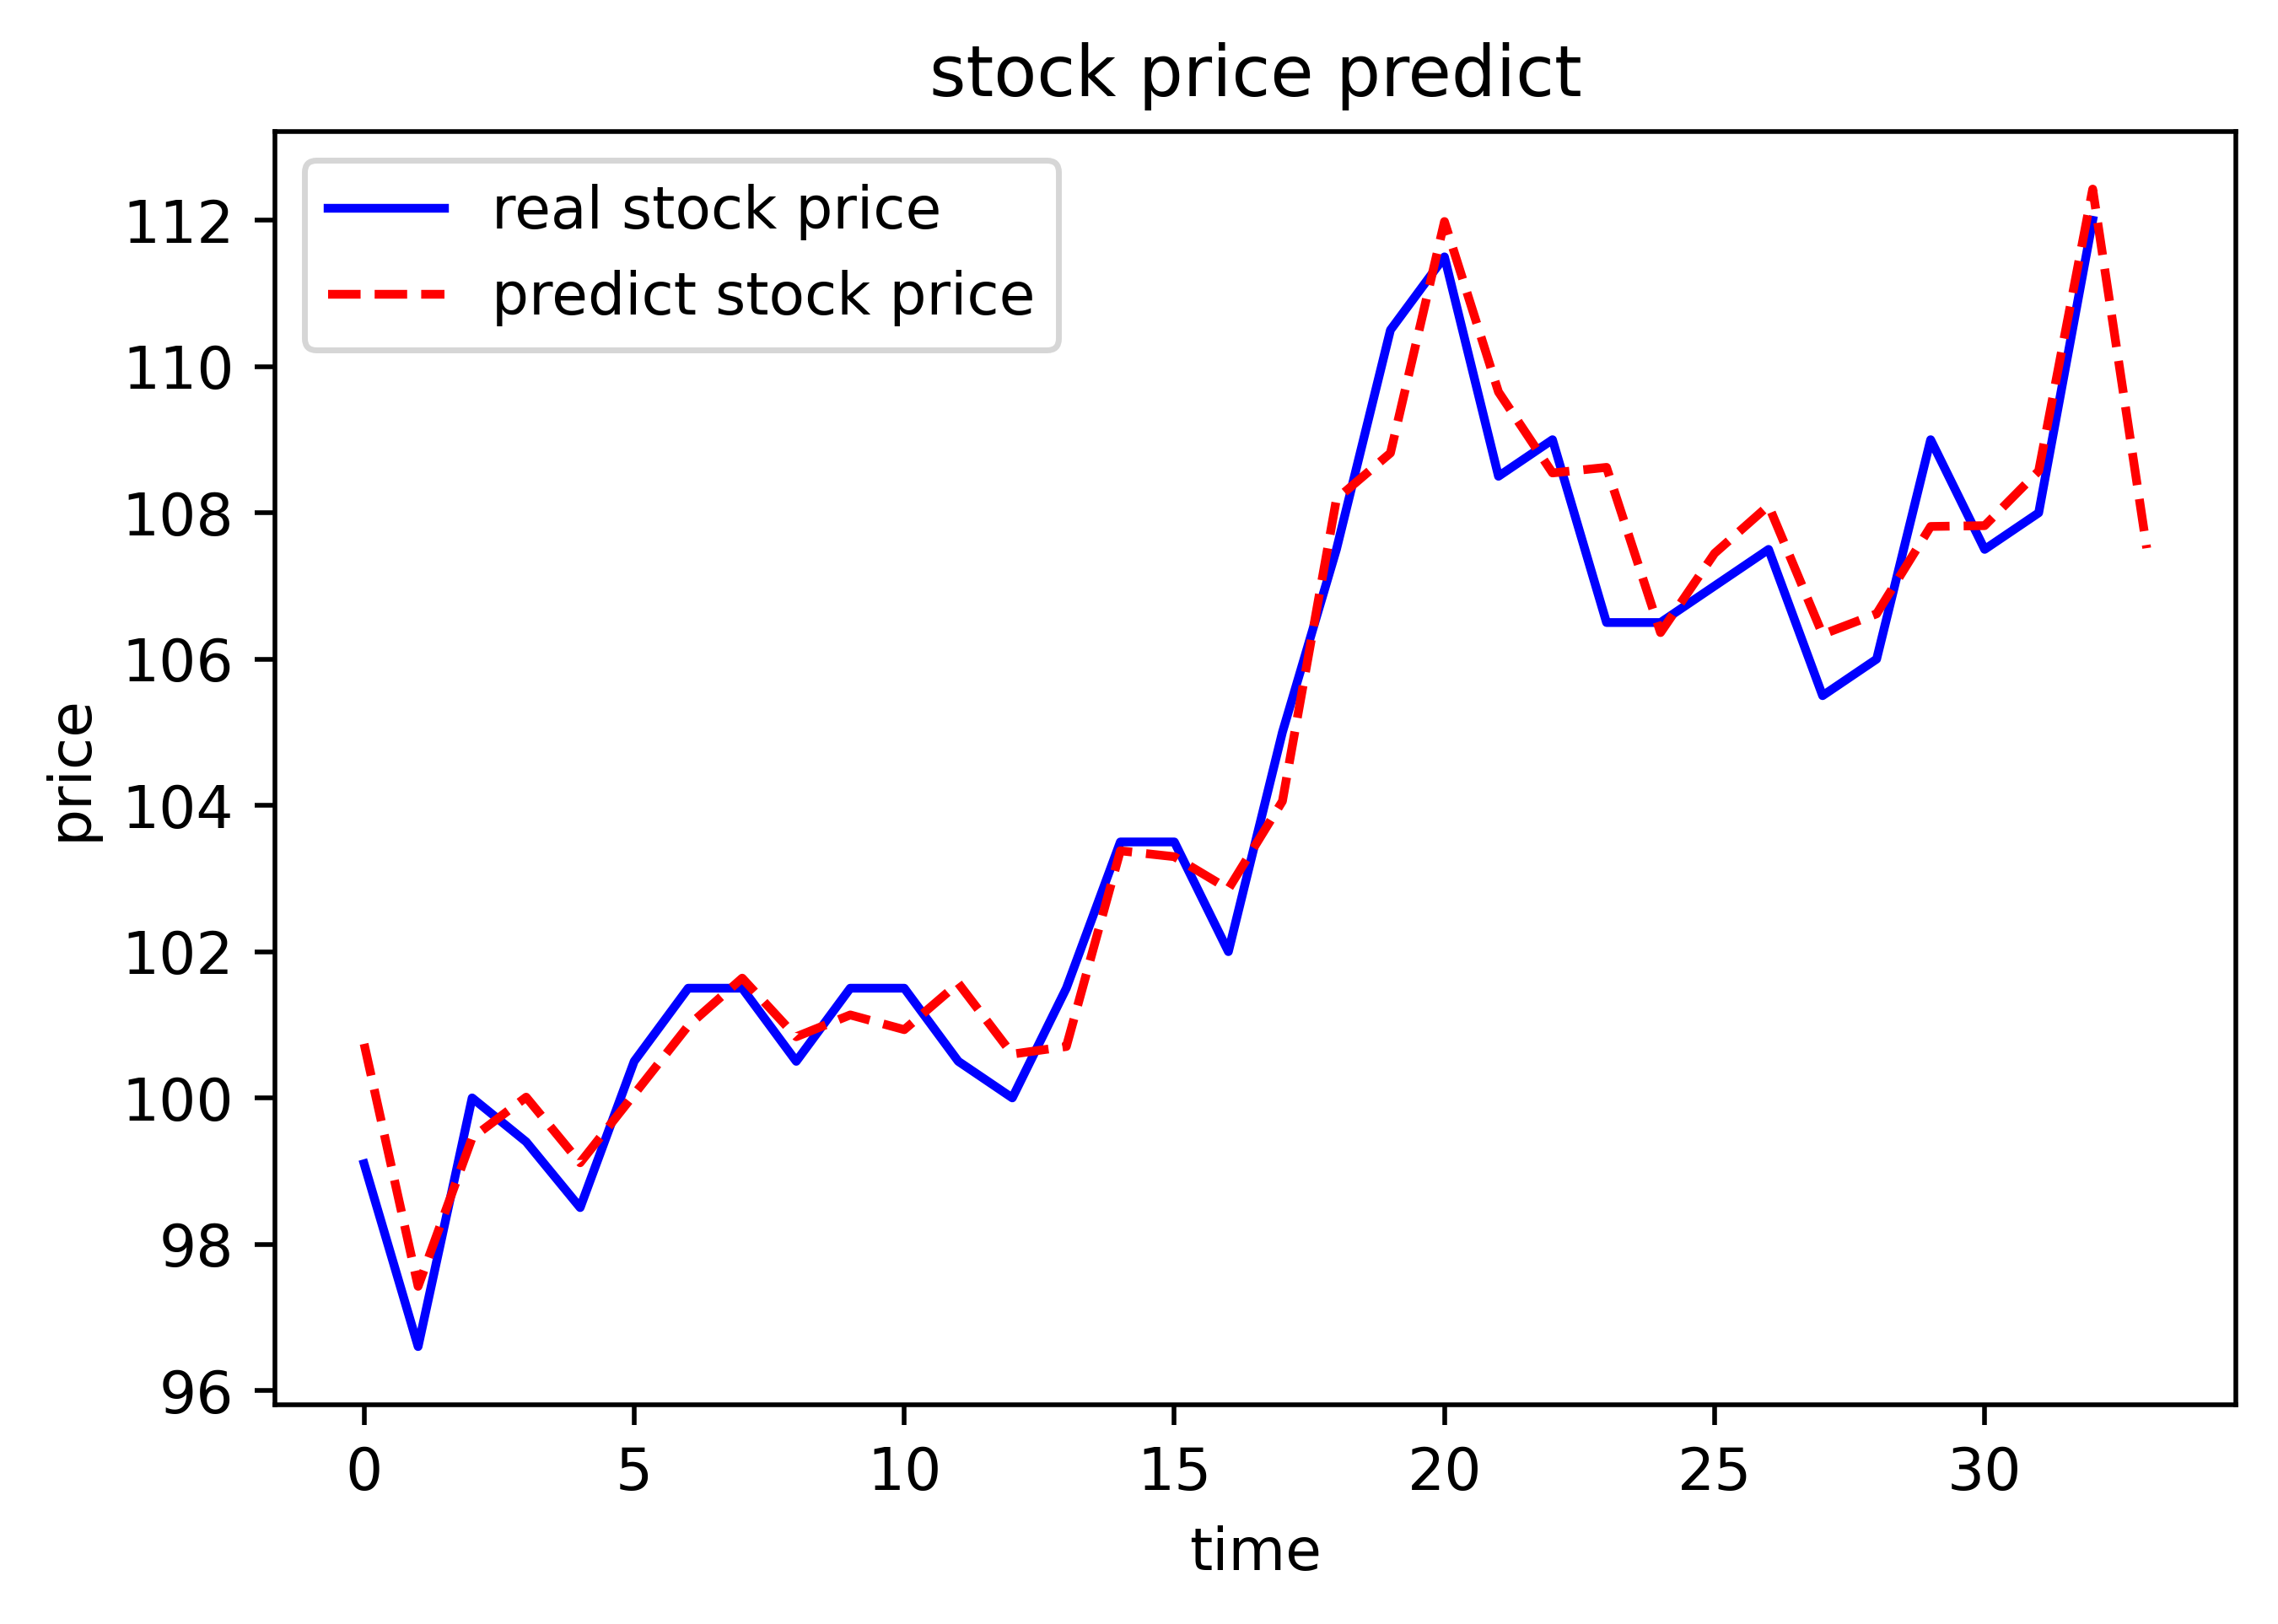

In [ ]:
import matplotlib.pyplot as plt
import keras 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.layers import LSTM

#split data
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence) + 1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
#normalization
def normalization(sequence, seq_min, seq_d):
    for i in range(len(sequence)):
        sequence[i] = (sequence[i] - seq_min)/seq_d
    return np.array(sequence)
# inverse normalization
def inv_nor(sequence, seq_min, seq_d):
    for i in range(len(sequence)):
        sequence[i] = (sequence[i]*seq_d) + seq_min
    return np.array(sequence)

def predict(nor_data):

    n_steps_in, n_steps_out = 20, 1
    n_features = 1
    model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/LSTM_stock(FP).h5')
    
    df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FP_stock.csv")
    
    raw_data = df.iloc[1250:1304, 1:2].values
    raw_data1 = df.iloc[1250:1304, 2:3].values
    raw_data2 = df.iloc[1250:1304, 3:4].values
    raw_data3 = df.iloc[1250:1304, 4:5].values
    
    real_data = df.iloc[1270:1304, 1:2].values
    real_date = df.iloc[1270:1304, 0:1]
    
    # seq_min, seq_d = 65.5, 52.0
    # seq_min1, seq_d1 = 67.4, 52.1
    # seq_min2, seq_d2 = 64.8, 51.7
    # seq_min3, seq_d3 = 66.6, 50.9
    
    raw_data = normalization(raw_data, nor_data.seq_min, nor_data.seq_d)
    raw_data1 = normalization(raw_data1, nor_data.seq_min1, nor_data.seq_d1)
    raw_data2 = normalization(raw_data2, nor_data.seq_min2, nor_data.seq_d2)
    raw_data3 = normalization(raw_data3, nor_data.seq_min3, nor_data.seq_d3)
    
    
    x_test, y_test = split_sequence(raw_data, n_steps_in, n_steps_out)
    x_test1, y_test1 = split_sequence(raw_data1, n_steps_in, n_steps_out)
    x_test2, y_test2 = split_sequence(raw_data2, n_steps_in, n_steps_out)
    x_test3, y_test3 = split_sequence(raw_data3, n_steps_in, n_steps_out)
    
    x_test = np.concatenate((x_test, x_test1, x_test2, x_test3), axis = 2)
    #reshape
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 4))
    # y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))
    
    
    yhat = model.predict(x_test, verbose=0)
    yhat = inv_nor(yhat, nor_data.seq_min, nor_data.seq_d)
    
    predict_data = yhat.reshape(yhat.shape[0], 1) 
    # print('MAE:', mean_absolute_error(real_data, predict_data))
    # real_data = df.iloc[20:564, 1:2].values
    # na = np.full((480, 1), np.nan)
    # predict_data = np.concatenate((na, predict_data), axis = 0)
    #plot
    plt.figure(1, dpi = 500)
    plt.plot(real_data, color = 'blue', label = 'real stock price')
    plt.plot(predict_data, color = 'red', label = 'predict stock price', linestyle='--')
    plt.title('stock price predict')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.legend()

predict(nor_data)